In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(os.listdir('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb'))

['fullcell.csv', 'fullcell-capa.csv', 'v-capa.csv', 'merged_time.csv']


In [5]:
file_path = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/fullcell.csv'
file_path_fullcellcapa = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/fullcell-capa.csv'
file_path_vcapa = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/v-capa.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 07 -- 17 : 00 : 30 ) - DCV DCI
0,17:00:31:156,0.000056,-0.004566,NaN,NaN
1,17:00:31:423,0.000145,-0.004546,NaN,NaN
2,17:00:31:687,0.000111,-0.004548,NaN,NaN
3,17:00:31:952,-0.000316,-0.004540,NaN,NaN
4,17:00:32:221,0.000274,-0.004544,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62873 entries, 0 to 62872
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Time                                                    62873 non-null  object 
 1   Value                                                   62873 non-null  float64
 2   Value_2ND                                               62873 non-null  float64
 3                                                           0 non-null      float64
 4   DateTime : ( 25 / 08 / 07 -- 17 : 00 : 30 )  - DCV DCI  0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 2.4+ MB


In [ ]:
df['Value_2ND_Positive'] = df['Value_2ND '].abs()

In [ ]:
start_time = pd.to_datetime("17:32:41.046000", format="%H:%M:%S.%f")
end_time = pd.to_datetime("23:59:59.999000", format="%H:%M:%S.%f")

df['Time_fixed'] = df['Time'].apply(lambda x: x + '000' if len(x.split(':')[-1]) == 3 else x)
df['Time_dt'] = pd.to_datetime(df['Time_fixed'], format='%H:%M:%S:%f')

df_filtered = df[(df['Time_dt'] >= start_time) & (df['Time_dt'] <= end_time)].copy()

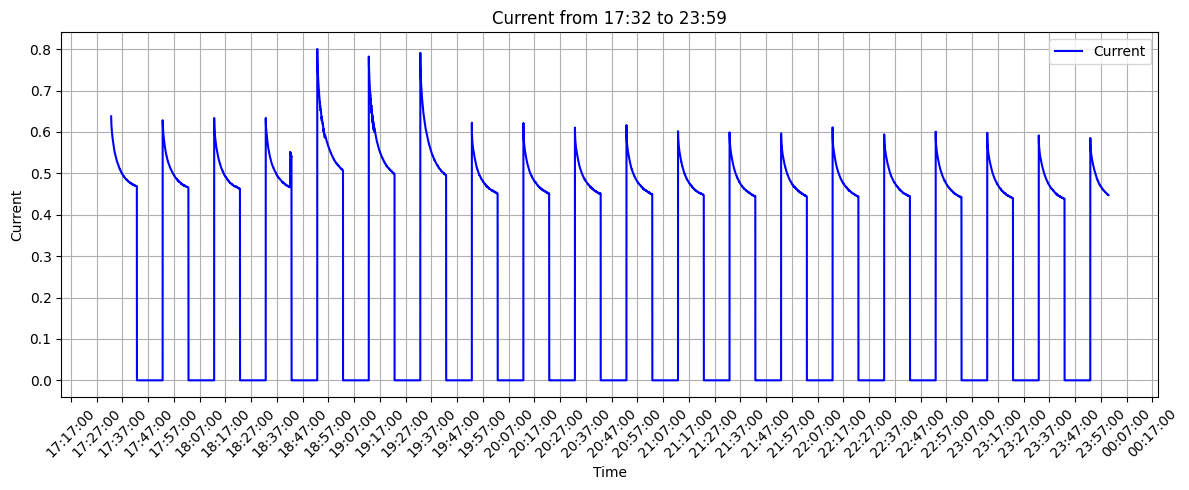

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(df_filtered['Time_dt'], df_filtered['Value_2ND '].abs(), color='blue', label='Current')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current from 17:32 to 23:59')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.signal import find_peaks

current = df_filtered['Value_2ND '].abs().values
time_vals = df_filtered['Time_dt'].values

peaks, _ = find_peaks(current, height=0.4, distance=30)

threshold = 0.05
results = []

for peak_idx in peaks:
    for i in range(peak_idx + 1, len(current)):
        if current[i] < threshold:
            results.append({
                "Peak Time": time_vals[peak_idx],
                "Peak Value": current[peak_idx],
                "Drop Time": time_vals[i],
                "Drop Value": current[i]
            })
            break

In [ ]:
df_events = pd.DataFrame(results)
print(df_events.head())

                Peak Time  Peak Value               Drop Time  Drop Value
0 1900-01-01 17:35:03.541    0.526678 1900-01-01 17:42:41.135     0.00002
1 1900-01-01 17:36:02.673    0.510605 1900-01-01 17:42:41.135     0.00002
2 1900-01-01 17:36:48.845    0.500285 1900-01-01 17:42:41.135     0.00002
3 1900-01-01 17:37:39.997    0.492690 1900-01-01 17:42:41.135     0.00002
4 1900-01-01 17:38:10.136    0.488488 1900-01-01 17:42:41.135     0.00002


In [ ]:
df_events['Peak Time'] = pd.to_datetime(df_events['Peak Time'])
df_events['Drop Time'] = pd.to_datetime(df_events['Drop Time'])

df_events['Duration (s)'] = (df_events['Drop Time'] - df_events['Peak Time']).dt.total_seconds()

In [ ]:
average_minutes = df_events['Duration (s)'].mean() / 60
print(f"Average time: {average_minutes:.2f} minutes")

Average time: 4.45 minutes


#filtered 13.45 - 20.45
value + , * i กรองเอาแค่ power <= 0.27

vacapa power >= 0.023

In [83]:
file_path_fullcell = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/13-08-2025-bb/fullcell.csv'
file_path_vcapa = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/13-08-2025-bb/capa.csv'

In [84]:
file_path_fullcell_1000 = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/12-08-2025-bb/fullcell.csv'
file_path_vcapa_1000 = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/12-08-2025-bb/capa.csv'

In [85]:
df1 = pd.read_csv(file_path_fullcell)
df2 = pd.read_csv(file_path_vcapa)

In [86]:
df1000 = pd.read_csv(file_path_fullcell_1000)
df2000 = pd.read_csv(file_path_vcapa_1000)

In [87]:
df1

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI
0,14:26:08:836,-0.002527,0.000044,NaN,NaN
1,14:26:09:108,-0.002377,0.000022,NaN,NaN
2,14:26:09:376,-0.002471,0.000024,NaN,NaN
3,14:26:09:646,-0.002502,0.000008,NaN,NaN
4,14:26:09:911,-0.002330,0.000036,NaN,NaN
...,...,...,...,...,...
243659,10:36:38:181,-4.249290,0.003963,NaN,NaN
243660,10:36:38:443,-4.248730,0.003976,NaN,NaN
243661,10:36:38:742,-4.247018,0.003952,NaN,NaN
243662,10:36:39:026,-4.247932,0.003959,NaN,NaN


In [88]:
df1000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI
0,13:44:30:611,-5.123329,0.040112,NaN,NaN
1,13:44:30:880,-5.123612,0.040118,NaN,NaN
2,13:44:31:146,-5.121438,0.040107,NaN,NaN
3,13:44:31:414,-5.121502,0.040097,NaN,NaN
4,13:44:31:680,-5.119889,0.040116,NaN,NaN
...,...,...,...,...,...
261641,10:09:12:348,-0.321345,0.000009,NaN,NaN
261642,10:09:12:610,-0.319777,0.000001,NaN,NaN
261643,10:09:12:878,-0.319047,0.000008,NaN,NaN
261644,10:09:13:272,-0.316912,0.000013,NaN,NaN


In [89]:
df1['Time_obj'] = pd.to_datetime(df1['Time'], format='%H:%M:%S:%f').dt.time

# Define start and end times
start_time = pd.to_datetime("17:45:00:000", format='%H:%M:%S:%f').time()
end_time = pd.to_datetime("21:45:00:000", format='%H:%M:%S:%f').time()

# Filter rows between times
df_filtered = df1[(df1['Time_obj'] >= start_time) & (df1['Time_obj'] <= end_time)].copy()

# Convert 'Value' to positive using absolute value
df_filtered['Value '] = df_filtered['Value '].abs()

In [90]:
df_filtered

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI,Time_obj
37475,17:45:00:157,4.182676,0.003918,NaN,NaN,17:45:00.157000
37476,17:45:00:428,4.182316,0.003932,NaN,NaN,17:45:00.428000
37477,17:45:00:703,4.179970,0.003930,NaN,NaN,17:45:00.703000
37478,17:45:00:969,4.180485,0.003918,NaN,NaN,17:45:00.969000
37479,17:45:01:242,4.178303,0.003918,NaN,NaN,17:45:01.242000
...,...,...,...,...,...,...
83219,21:44:58:236,4.450246,0.003972,NaN,NaN,21:44:58.236000
83220,21:44:58:601,4.449100,0.003968,NaN,NaN,21:44:58.601000
83221,21:44:58:973,4.446542,0.003982,NaN,NaN,21:44:58.973000
83222,21:44:59:341,4.444448,0.003977,NaN,NaN,21:44:59.341000


In [91]:
df1000['Time_obj'] = pd.to_datetime(df1000['Time'], format='%H:%M:%S:%f').dt.time

# Define start and end times
start_time = pd.to_datetime("17:45:00:000", format='%H:%M:%S:%f').time()
end_time = pd.to_datetime("21:45:00:000", format='%H:%M:%S:%f').time()

# Filter rows between times
df_filtered1000 = df1000[(df1000['Time_obj'] >= start_time) & (df1000['Time_obj'] <= end_time)].copy()

# Convert 'Value' to positive using absolute value
df_filtered1000['Value '] = df_filtered1000['Value '].abs()

In [93]:
df_filtered1000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI,Time_obj
51286,17:45:00:163,5.283947,0.038903,NaN,NaN,17:45:00.163000
51287,17:45:00:437,5.282575,0.038922,NaN,NaN,17:45:00.437000
51288,17:45:00:702,5.280588,0.038898,NaN,NaN,17:45:00.702000
51289,17:45:01:000,5.280008,0.038921,NaN,NaN,17:45:01
51290,17:45:01:279,5.278458,0.038918,NaN,NaN,17:45:01.279000
...,...,...,...,...,...,...
102377,21:44:58:702,4.607261,0.003981,NaN,NaN,21:44:58.702000
102378,21:44:58:966,4.606038,0.003990,NaN,NaN,21:44:58.966000
102379,21:44:59:271,4.605339,0.003987,NaN,NaN,21:44:59.271000
102380,21:44:59:640,4.604057,0.003975,NaN,NaN,21:44:59.640000


In [94]:
df2000['Time_obj'] = pd.to_datetime(df2000['Time'], format='%H:%M:%S:%f').dt.time

# Define start and end times
start_time = pd.to_datetime("17:45:00:000", format='%H:%M:%S:%f').time()
end_time = pd.to_datetime("21:45:00:000", format='%H:%M:%S:%f').time()

# Filter rows between times
df_filtered2000 = df2000[(df2000['Time_obj'] >= start_time) & (df2000['Time_obj'] <= end_time)].copy()

# Convert 'Value' to positive using absolute value
df_filtered2000['Value '] = df_filtered2000['Value '].abs()

In [95]:
df_filtered2000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI,Time_obj
51285,17:45:00:030,1.734514,0.012339,NaN,NaN,17:45:00.030000
51286,17:45:00:296,1.735412,0.012353,NaN,NaN,17:45:00.296000
51287,17:45:00:569,1.737573,0.012337,NaN,NaN,17:45:00.569000
51288,17:45:00:835,1.738482,0.012338,NaN,NaN,17:45:00.835000
51289,17:45:01:145,1.740863,0.012335,NaN,NaN,17:45:01.145000
...,...,...,...,...,...,...
102376,21:44:58:561,0.018988,0.000020,NaN,NaN,21:44:58.561000
102377,21:44:58:832,0.018984,0.000005,NaN,NaN,21:44:58.832000
102378,21:44:59:103,0.019005,0.000017,NaN,NaN,21:44:59.103000
102379,21:44:59:470,0.019017,-0.000003,NaN,NaN,21:44:59.470000


In [98]:
# Create 'power' column as Value * Value_2ND
df_filtered['power'] = df_filtered['Value '] * df_filtered['Value_2ND ']
df_filtered1000['power'] = df_filtered1000['Value '] * df_filtered1000['Value_2ND ']
df_filtered2000['power'] = df_filtered2000['Value '] * df_filtered2000['Value_2ND ']
# # Filter where power <= 0.27
# df_filtered = df_filtered[df_filtered['power'] <= 0.27]

In [99]:
df_filtered

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI,Time_obj,power
37475,17:45:00:157,4.182676,0.003918,NaN,NaN,17:45:00.157000,0.016386
37476,17:45:00:428,4.182316,0.003932,NaN,NaN,17:45:00.428000,0.016443
37477,17:45:00:703,4.179970,0.003930,NaN,NaN,17:45:00.703000,0.016427
37478,17:45:00:969,4.180485,0.003918,NaN,NaN,17:45:00.969000,0.016379
37479,17:45:01:242,4.178303,0.003918,NaN,NaN,17:45:01.242000,0.016372
...,...,...,...,...,...,...,...
83219,21:44:58:236,4.450246,0.003972,NaN,NaN,21:44:58.236000,0.017677
83220,21:44:58:601,4.449100,0.003968,NaN,NaN,21:44:58.601000,0.017653
83221,21:44:58:973,4.446542,0.003982,NaN,NaN,21:44:58.973000,0.017705
83222,21:44:59:341,4.444448,0.003977,NaN,NaN,21:44:59.341000,0.017674


In [100]:
df_filtered1000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI,Time_obj,power
51286,17:45:00:163,5.283947,0.038903,NaN,NaN,17:45:00.163000,0.205563
51287,17:45:00:437,5.282575,0.038922,NaN,NaN,17:45:00.437000,0.205611
51288,17:45:00:702,5.280588,0.038898,NaN,NaN,17:45:00.702000,0.205404
51289,17:45:01:000,5.280008,0.038921,NaN,NaN,17:45:01,0.205501
51290,17:45:01:279,5.278458,0.038918,NaN,NaN,17:45:01.279000,0.205426
...,...,...,...,...,...,...,...
102377,21:44:58:702,4.607261,0.003981,NaN,NaN,21:44:58.702000,0.018342
102378,21:44:58:966,4.606038,0.003990,NaN,NaN,21:44:58.966000,0.018379
102379,21:44:59:271,4.605339,0.003987,NaN,NaN,21:44:59.271000,0.018360
102380,21:44:59:640,4.604057,0.003975,NaN,NaN,21:44:59.640000,0.018300


In [101]:
df_filtered2000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI,Time_obj,power
51285,17:45:00:030,1.734514,0.012339,NaN,NaN,17:45:00.030000,2.140211e-02
51286,17:45:00:296,1.735412,0.012353,NaN,NaN,17:45:00.296000,2.143680e-02
51287,17:45:00:569,1.737573,0.012337,NaN,NaN,17:45:00.569000,2.143670e-02
51288,17:45:00:835,1.738482,0.012338,NaN,NaN,17:45:00.835000,2.144995e-02
51289,17:45:01:145,1.740863,0.012335,NaN,NaN,17:45:01.145000,2.147343e-02
...,...,...,...,...,...,...,...
102376,21:44:58:561,0.018988,0.000020,NaN,NaN,21:44:58.561000,3.871066e-07
102377,21:44:58:832,0.018984,0.000005,NaN,NaN,21:44:58.832000,8.869963e-08
102378,21:44:59:103,0.019005,0.000017,NaN,NaN,21:44:59.103000,3.199263e-07
102379,21:44:59:470,0.019017,-0.000003,NaN,NaN,21:44:59.470000,-5.468664e-08


In [111]:
df_filtered['energy'] = df_filtered['power'] + df_filtered['power'].shift(-1)

df_filtered = df_filtered.iloc[:-1].copy()

df_filtered1000['energy'] = df_filtered1000['power'] + df_filtered1000['power'].shift(-1)

df_filtered1000 = df_filtered1000.iloc[:-1].copy()

df_filtered2000['energy'] = df_filtered2000['power'] + df_filtered2000['power'].shift(-1)

df_filtered2000 = df_filtered2000.iloc[:-1].copy()

In [112]:
df_filtered

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI,Time_obj,power,energy
37475,17:45:00:157,4.182676,0.003918,NaN,NaN,17:45:00.157000,0.016386,0.032829
37476,17:45:00:428,4.182316,0.003932,NaN,NaN,17:45:00.428000,0.016443,0.032871
37477,17:45:00:703,4.179970,0.003930,NaN,NaN,17:45:00.703000,0.016427,0.032807
37478,17:45:00:969,4.180485,0.003918,NaN,NaN,17:45:00.969000,0.016379,0.032751
37479,17:45:01:242,4.178303,0.003918,NaN,NaN,17:45:01.242000,0.016372,0.032766
...,...,...,...,...,...,...,...,...
83216,21:44:57:129,4.456105,0.003969,NaN,NaN,21:44:57.129000,0.017685,0.035323
83217,21:44:57:499,4.453305,0.003961,NaN,NaN,21:44:57.499000,0.017638,0.035298
83218,21:44:57:868,4.453258,0.003966,NaN,NaN,21:44:57.868000,0.017660,0.035337
83219,21:44:58:236,4.450246,0.003972,NaN,NaN,21:44:58.236000,0.017677,0.035330


In [113]:
df_filtered1000

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 11 -- 13 : 44 : 30 ) - DCV DCI,Time_obj,power,energy
51286,17:45:00:163,5.283947,0.038903,NaN,NaN,17:45:00.163000,0.205563,0.411174
51287,17:45:00:437,5.282575,0.038922,NaN,NaN,17:45:00.437000,0.205611,0.411014
51288,17:45:00:702,5.280588,0.038898,NaN,NaN,17:45:00.702000,0.205404,0.410905
51289,17:45:01:000,5.280008,0.038921,NaN,NaN,17:45:01,0.205501,0.410927
51290,17:45:01:279,5.278458,0.038918,NaN,NaN,17:45:01.279000,0.205426,0.410780
...,...,...,...,...,...,...,...,...
102374,21:44:57:849,4.608470,0.003964,NaN,NaN,21:44:57.849000,0.018267,0.036628
102375,21:44:58:149,4.608367,0.003984,NaN,NaN,21:44:58.149000,0.018361,0.036672
102376,21:44:58:426,4.607473,0.003974,NaN,NaN,21:44:58.426000,0.018311,0.036653
102377,21:44:58:702,4.607261,0.003981,NaN,NaN,21:44:58.702000,0.018342,0.036720


In [114]:
total_energy = df_filtered.loc[df_filtered['energy'] > 0.001, 'energy'].sum()

print(f"Total Energy (> 0.001): {total_energy:.2f}")

Total Energy (> 0.001): 1548.30


In [117]:
total_energy1000 = df_filtered1000.loc[df_filtered1000['energy'] > 0.001, 'energy'].sum()

print(f"Total Energy (> 0.001): {total_energy1000:.2f}")

Total Energy (> 0.001): 9418.28


In [118]:
total_energy2000 = df_filtered2000.loc[df_filtered2000['energy'] > 0.001, 'energy'].sum()

print(f"Total Energy (> 0.001): {total_energy2000:.2f}")

Total Energy (> 0.001): 646.50


In [47]:
df_filtered.to_csv('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/13-08-2025-bb/filtered_power_fullcell.csv', index=False)

In [40]:
df_filtered.describe()

,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI,power
count,45686.000000,45686.000000,0.0,0.0,45686.000000
mean,2.321035,0.003606,NaN,NaN,0.016491
std,1.927674,0.007302,NaN,NaN,0.035965
min,0.048960,-0.000017,NaN,NaN,-0.000019
25%,0.332961,0.000011,NaN,NaN,0.000003
50%,1.464536,0.000032,NaN,NaN,0.000030
75%,4.097180,0.003931,NaN,NaN,0.016105
max,5.985049,0.264755,NaN,NaN,0.268607


/tmp/ipython-input-3557920591.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample('5T')


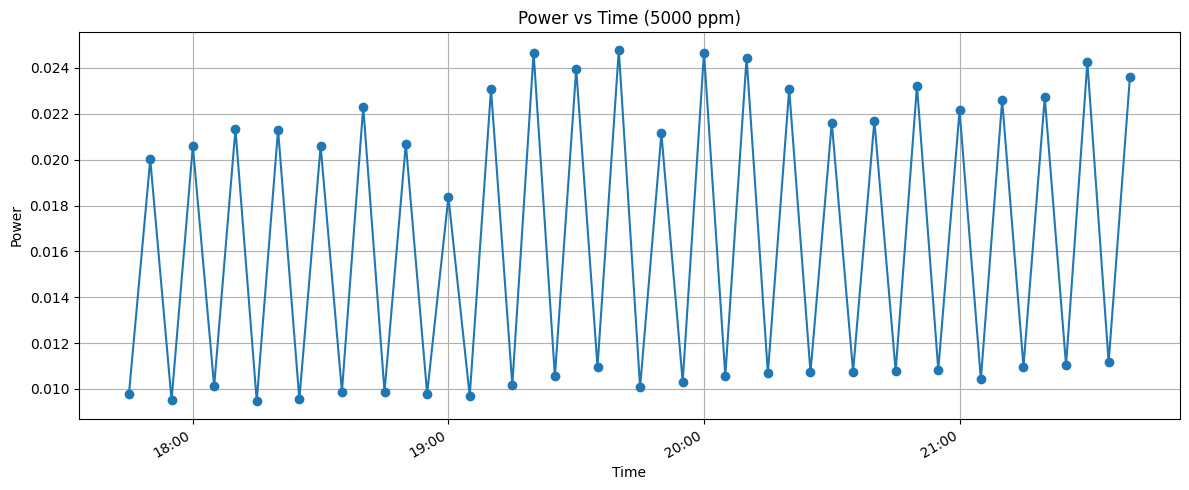

In [65]:
# ================= Plot every 5 minutes =================
import matplotlib.dates as mdates
# Convert Time to datetime for resampling
if 'Time_dt' not in df_filtered.columns:
    df_filtered['Time_dt'] = pd.to_datetime(df_filtered['Time'], format='%H:%M:%S:%f')

# Resample to 5-minute bins (mean)
df_5min = (
    df_filtered.set_index('Time_dt')
    .resample('5T')
    .agg({'power':'mean', 'Value ':'mean', 'Value_2ND ':'mean'})
    .dropna()
    .reset_index()
)

# Optional: save the 5-minute result
# df_5min.to_csv('filtered_power_5min.csv', index=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df_5min['Time_dt'], df_5min['power'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power vs Time (5000 ppm)')
# Format x-axis to show only time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
df2

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI
0,14:26:08:971,-0.034316,-6.184171e-06,NaN,NaN
1,14:26:09:243,-0.034276,3.233564e-07,NaN,NaN
2,14:26:09:507,-0.034290,1.230958e-05,NaN,NaN
3,14:26:09:778,-0.034307,-5.066429e-06,NaN,NaN
4,14:26:10:046,-0.034274,2.428648e-05,NaN,NaN
...,...,...,...,...,...
243659,10:36:38:313,-8.200349,1.228089e-06,NaN,NaN
243660,10:36:38:577,-8.200354,-3.550819e-06,NaN,NaN
243661,10:36:38:888,-8.200330,-9.167527e-06,NaN,NaN
243662,10:36:39:160,-8.200320,2.556370e-06,NaN,NaN


In [43]:
df2['Time_obj'] = pd.to_datetime(df2['Time'], format='%H:%M:%S:%f').dt.time

# Filter rows between times
df_filtered_2 = df2[(df2['Time_obj'] >= start_time) & (df2['Time_obj'] <= end_time)].copy()

# Convert 'Value' to positive using absolute value
df_filtered_2['Value '] = df_filtered_2['Value '].abs()

In [44]:
# Create 'power' column as Value * Value_2ND
df_filtered_2['power'] = df_filtered_2['Value '] * df_filtered_2['Value_2ND ']

In [45]:
df_filtered_2

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 12 -- 14 : 26 : 08 ) - DCV DCI,Time_obj,power
37474,17:45:00:015,2.884206,6.157652e-06,NaN,NaN,17:45:00.015000,0.000018
37475,17:45:00:292,2.884141,-3.661110e-06,NaN,NaN,17:45:00.292000,-0.000011
37476,17:45:00:564,2.884164,1.298412e-05,NaN,NaN,17:45:00.564000,0.000037
37477,17:45:00:834,2.884125,-6.045153e-07,NaN,NaN,17:45:00.834000,-0.000002
37478,17:45:01:101,2.884141,7.079565e-06,NaN,NaN,17:45:01.101000,0.000020
...,...,...,...,...,...,...,...
83219,21:44:58:421,6.002549,-2.876772e-06,NaN,NaN,21:44:58.421000,-0.000017
83220,21:44:58:788,6.002530,2.761240e-06,NaN,NaN,21:44:58.788000,0.000017
83221,21:44:59:161,6.002448,-2.080996e-05,NaN,NaN,21:44:59.161000,-0.000125
83222,21:44:59:530,6.002407,1.999749e-05,NaN,NaN,21:44:59.530000,0.000120


In [56]:
df_filtered_2['energy'] = df_filtered_2['power'] + df_filtered_2['power'].shift(-1)

df_filtered_2 = df_filtered_2.iloc[:-1].copy()

In [57]:
total_energy_capa = df_filtered_2.loc[df_filtered_2['energy'] > 0.001, 'energy'].sum()

print(f"Total Energy (> 0.001): {total_energy_capa:.2f}")

Total Energy (> 0.001): 176.47


In [49]:
df_filtered_2.to_csv('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/13-08-2025-bb/filtered_power_capa.csv', index=False)

/tmp/ipython-input-786675759.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .resample('5T')


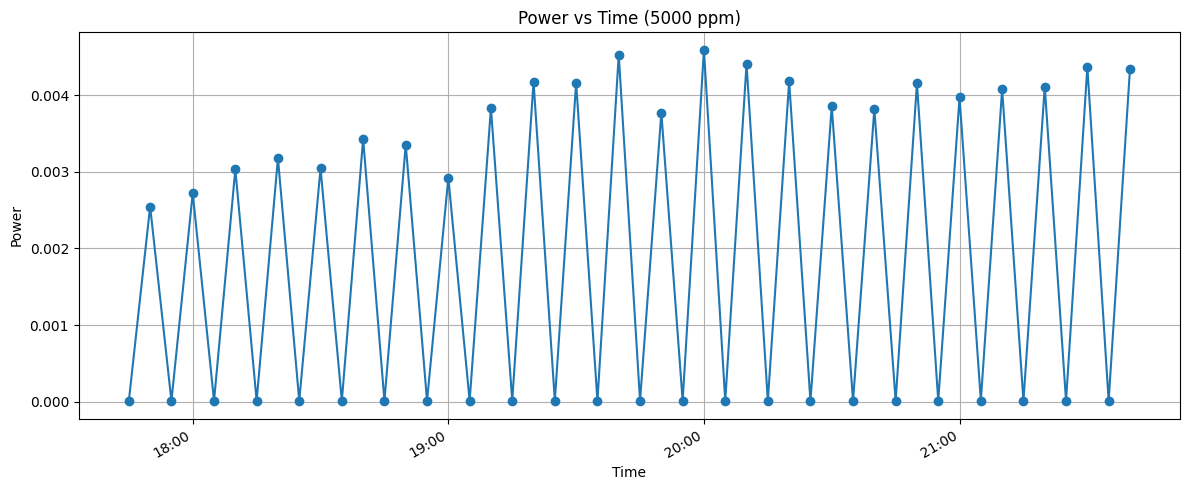

In [66]:
# ================= Plot every 5 minutes =================
import matplotlib.dates as mdates
# Convert Time to datetime for resampling
if 'Time_dt' not in df_filtered_2.columns:
    df_filtered_2['Time_dt'] = pd.to_datetime(df_filtered_2['Time'], format='%H:%M:%S:%f')

# Resample to 5-minute bins (mean)
df_5min = (
    df_filtered_2.set_index('Time_dt')
    .resample('5T')
    .agg({'power':'mean', 'Value ':'mean', 'Value_2ND ':'mean'})
    .dropna()
    .reset_index()
)

# Optional: save the 5-minute result
# df_5min.to_csv('filtered_power_5min.csv', index=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df_5min['Time_dt'], df_5min['power'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power vs Time (5000 ppm)')
# Format x-axis to show only time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
er = (total_energy_capa / total_energy) * 100

In [125]:
print(f"energy conversion effiency with 5000 ppm : {er:.2f} %")

energy conversion effiency with 5000 ppm : 11.40 %


In [126]:
er2 = (total_energy2000 / total_energy1000) * 100

In [127]:
print(f"energy conversion effiency with 1000 ppm : {er2:.2f} %")

energy conversion effiency with 1000 ppm : 6.86 %


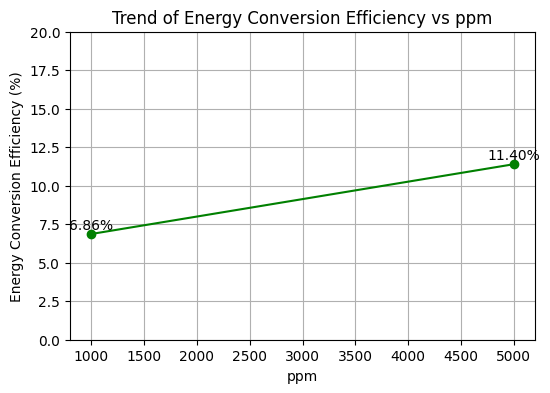

In [131]:
import matplotlib.pyplot as plt

ppm_values = [1000, 5000]
efficiency_values = [er2, er]  # er2 = 1000 ppm, er = 5000 ppm

plt.figure(figsize=(6,4))
plt.plot(ppm_values, efficiency_values, marker='o', linestyle='-', color='green')

plt.xlabel('ppm')
plt.ylabel('Energy Conversion Efficiency (%)')
plt.title('Energy Conversion Efficiency vs ppm')
plt.ylim(0, 20)
plt.grid(True)

for x, y in zip(ppm_values, efficiency_values):
    plt.text(x, y + 0.3, f"{y:.2f}%", ha='center')

plt.show()


# Combine time

In [ ]:
def fix_time_column(df):
    df['Time_fixed'] = df['Time'].apply(lambda x: x + '000' if len(x.split(':')[-1]) == 3 else x)
    df['Time_str'] = pd.to_datetime(df['Time_fixed'], format='%H:%M:%S:%f').dt.strftime('%H:%M:%S')
    return df

df1 = fix_time_column(df1)
df2 = fix_time_column(df2)

In [ ]:
df1

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI,Time_fixed,Time_str
0,11:33:47:995,-5.363818,0.036930,NaN,NaN,11:33:47:995000,11:33:47
1,11:33:48:263,-5.363056,0.036923,NaN,NaN,11:33:48:263000,11:33:48
2,11:33:48:528,-5.362327,0.036899,NaN,NaN,11:33:48:528000,11:33:48
3,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48
4,11:33:49:068,-5.360516,0.036909,NaN,NaN,11:33:49:068000,11:33:49
...,...,...,...,...,...,...,...
6460,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12
6461,12:04:12:391,-1.239967,0.000002,NaN,NaN,12:04:12:391000,12:04:12
6462,12:04:12:659,-1.235714,0.000022,NaN,NaN,12:04:12:659000,12:04:12
6463,12:04:12:933,-1.225725,0.000011,NaN,NaN,12:04:12:933000,12:04:12


In [ ]:
merged_df = pd.merge(df1, df2, on='Time_str', suffixes=('_fullcell', '_vcapa'))

merged_df = merged_df.sort_values(by='Time_str').reset_index(drop=True)

In [ ]:
merged_df

,Time_fullcell,Value _fullcell,Value_2ND _fullcell,_fullcell,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI_fullcell,Time_fixed_fullcell,Time_str,Time_vcapa,Value _vcapa,Value_2ND _vcapa,_vcapa,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI_vcapa,Time_fixed_vcapa
0,11:33:48:263,-5.363056,0.036923,NaN,NaN,11:33:48:263000,11:33:48,11:33:48:129,-2.190908,1.147554e-02,NaN,NaN,11:33:48:129000
1,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:935,-2.194330,1.148192e-02,NaN,NaN,11:33:48:935000
2,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:663,-2.193512,1.146461e-02,NaN,NaN,11:33:48:663000
3,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:395,-2.191703,1.147741e-02,NaN,NaN,11:33:48:395000
4,11:33:48:528,-5.362327,0.036899,NaN,NaN,11:33:48:528000,11:33:48,11:33:48:935,-2.194330,1.148192e-02,NaN,NaN,11:33:48:935000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12,12:04:12:523,-4.928089,7.367063e-06,NaN,NaN,12:04:12:523000
22761,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12,12:04:12:251,-4.928171,-3.342221e-07,NaN,NaN,12:04:12:251000
22762,12:04:12:391,-1.239967,0.000002,NaN,NaN,12:04:12:391000,12:04:12,12:04:12:791,-4.927834,-5.672805e-06,NaN,NaN,12:04:12:791000
22763,12:04:13:199,-1.221480,0.000016,NaN,NaN,12:04:13:199000,12:04:13,12:04:13:066,-4.927739,1.199569e-05,NaN,NaN,12:04:13:066000


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/merged_time.csv', index=False)